In [2]:
import urllib, requests, re

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import json

In [25]:
import matplotlib.pyplot as plt

In [6]:
ctUrl2 = urllib.request.urlopen('https://clinicaltrials.gov/api/query/study_fields?expr=covid-19&fields=BriefTitle%2C+BriefSummary%2CCollaboratorName%2C+IsFDARegulatedDrug%2C+LeadSponsorName%2C+LocationCountry%2C+StartDate%2COverallStatus%2CDetailedDescription%2CResponsiblePartyType&min_rnk=1&max_rnk=1000&fmt=json')

In [7]:
ctData2 = ctUrl2.read()

In [8]:
ct_json2=json.loads(ctData2)

In [28]:
df2.head(20)

,BriefTitle,BriefSummary,CollaboratorName,IsFDARegulatedDrug,LeadSponsorName,LocationCountry,StartDate,OverallStatus,DetailedDescription,ResponsiblePartyType
0,COVID-19 Infection in Patients With Hepatocell...,"Since December 2019, a new disease named COVID...",Centre Hospitalier-Universitaire Bondy,No,"Centre Hospitalier Universitaire, Amiens",France,"April 27, 2020",Recruiting,None,Sponsor
1,Comparison of the Efficacy of Rapid Tests to I...,This study is designed to compare the efficacy...,None,No,Texas Cardiac Arrhythmia Research Foundation,None,May 2020,Not yet recruiting,The investigators hypothesize that viral-RNA t...,Principal Investigator
2,Evaluation of Clinical Parameters on Admission...,Investigators will recruit patients diagnosed ...,None,No,Nisantasi University,Turkey,"May 1, 2020",Recruiting,Covid-19 infections demonstrated a pandemic sp...,Principal Investigator
3,COVID-19 Surveillance of Patients and Healthca...,"Doctors, nurses and staff members of ear-nose ...",None,No,"Rigshospitalet, Denmark",Denmark,"March 23, 2020",Enrolling by invitation,"At present the COVID-19 pandemic is evolving, ...",Principal Investigator
4,Viral Infection and Respiratory Illness Univer...,Researchers are creating a real time COVID-19 ...,None,No,Mayo Clinic,United States,"March 30, 2020",Recruiting,Investigators aim is to create a real time COV...,Principal Investigator
5,Characteristics and Outcome of Coronavirus Dis...,The World Health Organization (WHO) has recent...,None,No,Assiut University,None,"May 1, 2020",Not yet recruiting,Patients admitted to Assiut University hospita...,Principal Investigator
6,"Assessment of Obstetric, Fetal and Neonatal Ri...",A new coronavirus (COVID-19) highlighted at th...,None,No,"University Hospital, Toulouse",France,"April 17, 2020",Recruiting,The main objective of this project is to set u...,Sponsor
7,Convalescent Plasma in ICU Patients With COVID...,This study will assess the feasibility of admi...,Johns Hopkins University,Yes,Noah Merin,United States,May 2020,Not yet recruiting,Convalescent plasma is an antibody-rich produc...,Sponsor-Investigator
8,CoVID-19 Plasma in Treatment of COVID-19 Patients,The investigatores propose to evaluate intrave...,None,Yes,The Christ Hospital,United States,April 2020,Recruiting,"Coronavirus's are responsible for 15-30% of ""c...",Principal Investigator
9,Clinical Application of Methylene Blue for Tre...,The severe acute respiratory syndrome caused b...,None,No,Mashhad University of Medical Sciences,"Iran, Islamic Republic of","April 19, 2020",Recruiting,None,Principal Investigator


In [17]:
df2.describe()

,BriefTitle,BriefSummary,CollaboratorName,IsFDARegulatedDrug,LeadSponsorName,LocationCountry,StartDate,OverallStatus,DetailedDescription,ResponsiblePartyType
count,1000,1000,324,976,1000,805,988,1000,694,1000
unique,997,997,287,2,606,60,126,10,693,3
top,Study Assessing Vagus Nerve Stimulation in CoV...,"The present study is a randomized, double-blin...",Institut National de la Santé Et de la Recherc...,No,Assistance Publique - Hôpitaux de Paris,United States,April 2020,Recruiting,The process is based on obtaining plasma from ...,Sponsor
freq,2,2,4,785,34,214,86,486,2,581


In [22]:
df2.dtypes

BriefTitle              object
BriefSummary            object
CollaboratorName        object
IsFDARegulatedDrug      object
LeadSponsorName         object
LocationCountry         object
StartDate               object
OverallStatus           object
DetailedDescription     object
ResponsiblePartyType    object
dtype: object

In [31]:
df4['ResponsiblePartyType']= pd.Categorical(df4['ResponsiblePartyType'], categories=['Sponsor', 'Principal Investigator', 'Sponsor-Investigator' ])

/Users/shauryajoshi/opt/anaconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### more that 50% of the trial were sponsored

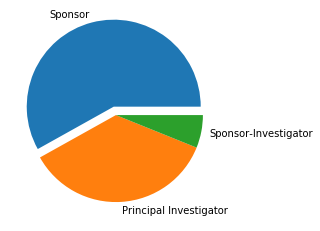

In [396]:
plt.pie(df2['ResponsiblePartyType'].value_counts(), labels=['Sponsor', 'Principal Investigator', 'Sponsor-Investigator'],explode=(0.1,0,0))
plt.show()

### decided to drop non sponsored trials

In [77]:
df4=df2.loc[df2['ResponsiblePartyType']=='Sponsor']

In [79]:
df4.head()

,BriefTitle,BriefSummary,CollaboratorName,IsFDARegulatedDrug,LeadSponsorName,LocationCountry,StartDate,OverallStatus,DetailedDescription,ResponsiblePartyType
0,COVID-19 Infection in Patients With Hepatocell...,"Since December 2019, a new disease named COVID...",Centre Hospitalier-Universitaire Bondy,No,"Centre Hospitalier Universitaire, Amiens",France,"April 27, 2020",Recruiting,None,Sponsor
6,"Assessment of Obstetric, Fetal and Neonatal Ri...",A new coronavirus (COVID-19) highlighted at th...,None,No,"University Hospital, Toulouse",France,"April 17, 2020",Recruiting,The main objective of this project is to set u...,Sponsor
10,Slovenian National COVID-19 Prevalence Study,The investigators are conducting a national CO...,None,No,University of Ljubljana,Slovenia,"April 20, 2020",Recruiting,The investigators are conducting a national CO...,Sponsor
11,Clinical Characteristics and Outcomes of Pedia...,Rationale: The clinical manifestations of SARS...,None,No,University of Calgary,Canada,"March 18, 2020",Recruiting,Pediatric COVID-19: The characteristics of ped...,Sponsor
13,ANTIBODY BASED TESTS FOR SARSCoV-2 COVID-19) -...,This study will be conducted as a registry to ...,None,No,Texas Cardiac Arrhythmia Research Foundation,United States,"March 27, 2020",Recruiting,This study will be conducted as a registry to ...,Sponsor


### trials all over the world 48 countries France#1...before non-sponsored trials were droped USA#1

In [80]:
df4.describe()

,BriefTitle,BriefSummary,CollaboratorName,IsFDARegulatedDrug,LeadSponsorName,LocationCountry,StartDate,OverallStatus,DetailedDescription,ResponsiblePartyType
count,581,581,176,563,581,469,572,581,383,581
unique,580,581,159,2,329,48,98,8,383,1
top,Acalabrutinib Study With Best Supportive Care ...,The investigators aim to evaluate the efficacy...,Institut National de la Santé Et de la Recherc...,No,Assistance Publique - Hôpitaux de Paris,France,April 2020,Recruiting,A free monitoring app 'COVID-19 Symptom Tracke...,Sponsor
freq,2,1,3,449,34,146,60,296,1,581


In [131]:
col_bio = df4["CollaboratorName"].loc[df4["CollaboratorName"].str.find("Bio")>=0]

In [132]:
col_bio

87                                            BioMérieux
180       Hope Biosciences Stem Cell Research Foundation
371                             Eiger BioPharmaceuticals
413    Chongqing Sidemu Biotechnology Technology Co.,...
577                                  BioClever 2005 S.L.
771                               CanSino Biologics Inc.
862                                           BioMérieux
Name: CollaboratorName, dtype: object

In [120]:
col_pharma=df4["CollaboratorName"].loc[df4["CollaboratorName"].str.find('Pharma')>=0]

In [121]:
col_pharma

133                              Innate Pharma
371                   Eiger BioPharmaceuticals
501        Teva Pharmaceuticals Industries LTD
602                         Acerta Pharma B.V.
604                         Acerta Pharma B.V.
655                               Iltoo Pharma
701                            Roche Pharma AG
869                       Bordeaux PharmacoEpi
956    WanBangDe Pharmaceutical Group Co.,Ltd.
Name: CollaboratorName, dtype: object

In [148]:
col_sci=df4["CollaboratorName"].loc[df4["CollaboratorName"].str.find('Science')>=0]

In [149]:
col_sci

156    Institut National des Sciences Appliquées (INSA)
630                       London Health Sciences Centre
Name: CollaboratorName, dtype: object

In [165]:
spo_bio=df4["LeadSponsorName"].loc[df4["LeadSponsorName"].str.find('Bio')>=0]

In [166]:
spo_bio

82                                     Apeiron Biologics
104                                Ansun Biopharma, Inc.
180                                     Hope Biosciences
207                                       Biosearch S.A.
397                                     Hope Biosciences
420                                     Inmune Bio, Inc.
423                                         ProgenaBiome
431                       Biohaven Pharmaceuticals, Inc.
469                                     Hope Biosciences
493                                AVM Biotechnology LLC
632                                   Can-Fite BioPharma
637                                Applied Biology, Inc.
646                Tianhe Stem Cell Biotechnologies Inc.
664                                          Biontech SE
676    Institute of Biophysics and Cell Engineering o...
771    Insitute of Biotechnology, Academy of Military...
803                           BioAegis Therapeutics Inc.
831                            

In [167]:
spo_pharma=df4["LeadSponsorName"].loc[df4["LeadSponsorName"].str.find('Pharma')>=0]

In [168]:
spo_pharma

163                               Bukwang Pharmaceutical
186                                        Hilton Pharma
378    Mario Negri Institute for Pharmacological Rese...
390                                Covis Pharma S.à.r.l.
403                             Novartis Pharmaceuticals
409                         Target PharmaSolutions, Inc.
431                       Biohaven Pharmaceuticals, Inc.
444                             Novartis Pharmaceuticals
446                                            PharmaMar
478    Uni-Pharma Kleon Tsetis Pharmaceutical Laborat...
520                            Regeneron Pharmaceuticals
553                Fujifilm Pharmaceuticals U.S.A., Inc.
632                                   Can-Fite BioPharma
713                             Novartis Pharmaceuticals
750                             Novartis Pharmaceuticals
784    Uni-Pharma Kleon Tsetis Pharmaceutical Laborat...
826                             Novartis Pharmaceuticals
831                            

In [169]:
spo_sci=df4["LeadSponsorName"].loc[df4["LeadSponsorName"].str.find('Science')>=0]

In [170]:
spo_sci

169    Louisiana State University Health Sciences Cen...
251                                 TASK Applied Science
379       Institute of Liver and Biliary Sciences, India
415                 Hamilton Health Sciences Corporation
455    Puren Hospital Affiliated to Wuhan University ...
660                    Sunnybrook Health Sciences Centre
666               Wake Forest University Health Sciences
676    Institute of Biophysics and Cell Engineering o...
683                                      Gilead Sciences
697                                      Gilead Sciences
723               Wake Forest University Health Sciences
746       Institute of Liver and Biliary Sciences, India
771    Insitute of Biotechnology, Academy of Military...
878    University of Social Sciences and Humanities, ...
915                               Kinevant Sciences GmbH
Name: LeadSponsorName, dtype: object

In [352]:
spo_sci=df4["CollaboratorName"].loc[df4["CollaboratorName"].str.find('Pfizer')>=0]

In [353]:
spo_sci

601    Pfizer
664    Pfizer
Name: CollaboratorName, dtype: object

### NLP to assess study sentiments

In [275]:
df_na_2 =df4.loc[df4['DetailedDescription'].isnull() == False]

In [292]:
df_na_2.shape

(383, 11)

In [197]:
import tensorflow as tf

In [198]:
tf.__version__

'2.0.0'

In [199]:
from tensorflow import keras

In [200]:
pip install -q tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [201]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [202]:
import tensorflow_datasets as tfds

In [203]:
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised=True)

In [204]:
train_data, test_data = imdb['train'], imdb['test']

In [205]:
training_sentences = []
training_labels =[]

testing_sentences = []
testing_labels =[]

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
    
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [206]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [207]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token= oov_tok)

In [208]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen = max_length, truncating=trunc_type)

#testing 

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [212]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [213]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [214]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [215]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 72s 3ms/sample - loss: 0.4946 - accuracy: 0.7443 - val_loss: 0.3440 - val_accuracy: 0.8491
Epoch 2/10
25000/25000 [==============================] - 10s 407us/sample - loss: 0.2376 - accuracy: 0.9108 - val_loss: 0.3777 - val_accuracy: 0.8346
Epoch 3/10
25000/25000 [==============================] - 9s 379us/sample - loss: 0.0880 - accuracy: 0.9778 - val_loss: 0.4745 - val_accuracy: 0.8192
Epoch 4/10
25000/25000 [==============================] - 10s 381us/sample - loss: 0.0207 - accuracy: 0.9972 - val_loss: 0.5304 - val_accuracy: 0.8236
Epoch 5/10
25000/25000 [==============================] - 9s 374us/sample - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.5874 - val_accuracy: 0.8262
Epoch 6/10
25000/25000 [==============================] - 9s 366us/sample - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.6346 - val_accuracy: 0.8263
Epoch 7/10
25000/25000 [=========================

In [278]:
test_sequences = tokenizer.texts_to_sequences(df_sentences)

In [279]:
padd_test_sequences = pad_sequences(test_sequences, padding='post', maxlen=120)
padd_test_sequences[0]

array([   1, 2212,    6,  820,   70,    1, 2723,    6,    1,    1,  236,
          9,  670,    6, 2104, 2777,  370,   17,   35,    1,    1, 5603,
          1,  317,   70,    1,    2, 7162,   60,   81,    1,   38,    2,
          1,  819,  374,    4,  281,  104,    9,  670,    6, 6915,    2,
          1,    5, 2777,  370, 4682, 3817,    6,    1,    1,  236,    9,
        406,    1,    1,    1,   81,   29, 2978,   46,  104,    2,    1,
       5131,    6,   24,    1,    1,    9,  207,    5, 3152,    2, 2947,
          7,    6,   28,    4,  130, 1877,    5,    2,    1,    1,  236,
          1,    3,    1, 6498,    9,  851,   94, 3892,    9,    1,    1,
          1,    3,    1,    3,    6,  130,  397,    2, 9537, 3923,    3,
          2,    1,    5,    1,  752,   12,  851,  440,  503, 3776],
      dtype=int32)

In [282]:
predicted_results=model.predict(padd_test_sequences)

In [284]:
# np.delete(predicted_results, 1)

In [285]:
predicted_results.shape

(383, 1)

In [286]:
np.delete(predicted_results, 1)

array([3.79404426e-03, 8.31407428e-01, 1.15122914e-01, 9.93105888e-01,
       3.29785347e-02, 9.18225467e-01, 1.53422356e-04, 9.99713182e-01,
       6.99520111e-04, 2.61547685e-01, 9.57989693e-02, 1.94237143e-01,
       6.05821609e-04, 2.64307857e-01, 8.36674452e-01, 7.69786000e-01,
       9.94084716e-01, 1.50372893e-01, 5.93066216e-06, 9.78597403e-01,
       4.56452131e-01, 7.05718994e-04, 8.74976754e-01, 9.78292048e-01,
       8.39653611e-01, 7.97383785e-01, 8.27011228e-01, 7.33968914e-02,
       9.99944687e-01, 9.96957421e-01, 8.97655785e-02, 6.94006681e-04,
       8.29004705e-01, 6.11228645e-02, 6.49988651e-05, 9.97398555e-01,
       7.41232097e-01, 2.59280205e-06, 1.93715096e-06, 2.66897678e-03,
       6.26947522e-01, 9.90566492e-01, 1.01327896e-06, 9.94199038e-01,
       4.58727837e-01, 2.55966187e-03, 9.99994874e-01, 8.95595014e-01,
       9.99511719e-01, 9.98904228e-01, 5.89273930e-01, 5.37191331e-02,
       2.11247802e-03, 1.75505877e-04, 1.60444736e-01, 9.45112884e-01,
      

In [289]:
df_na_2['predicted_sentiment']=predicted_results

/Users/shauryajoshi/opt/anaconda3/envs/tdi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [310]:
df_na_2['predicted_sentiment'].mean()

0.42241955

In [315]:
df_positive=df_na_2.loc[df_na_2['predicted_sentiment']>=0.42241955]

In [314]:
df_negative = df_na_2.loc[df_na_2['predicted_sentiment']<0.422419555]

(array([175.,  21.,  12.,   8.,   3.,   5.,  11.,  21.,  18., 109.]),
 array([4.47034836e-07, 1.00000404e-01, 2.00000361e-01, 3.00000310e-01,
        4.00000274e-01, 5.00000238e-01, 6.00000203e-01, 7.00000107e-01,
        8.00000072e-01, 9.00000036e-01, 1.00000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

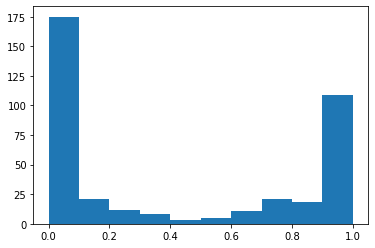

In [313]:
plt.hist(df_na_2['predicted_sentiment'])

In [367]:
df_positive[['LeadSponsorName', 'CollaboratorName']]

,LeadSponsorName,CollaboratorName
11,University of Calgary,None
16,University Hospital Tuebingen,None
19,"University Hospital, Angers",None
36,Fundacion SEIMC-GESIDA,None
46,Johns Hopkins University,None
...,...,...
981,Assistance Publique - Hôpitaux de Paris,None
987,Fondazione per la Ricerca Ospedale Maggiore,European Leukemia Net
990,"University Health Network, Toronto",None
991,National Institute of Mental Health (NIMH),None
